## 1. Import Libraries

## 2. Identifying Clusters

### a. Elbow technique

### b. Silhouette Analysis

# 3. k-means clustering

# 4. further analysis of GDP clusters

--------

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import os
os.environ["OMP_NUM_THREADS"] = '4'
import sklearn
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import pylab as pl
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating Pathway for data
path =(r'C:\Users\colmu\Desktop\Documents\GitHub Documents\CF_WHR')

In [4]:
#Importing dataset WHR_GDP_2015to2019
df =pd.read_csv(os.path.join(path,'data','Prepared Data','WHR_GDP_2015to2019.csv'))
df

,year,Country,region,happiness_rank,happiness_score,perceptions_of_economy,social_support,healthy_life_expectancy,perceptions_of_freedom,perceptions_of_generosity,perceptions_of_corruption,GDP,GDP_per_capita,GDP_per_capita_annual_ growth
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,6.940000e+11,83806.447600,0.494130
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.751721e+10,52951.681510,3.354145
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,3.030000e+11,53254.856370,1.622166
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,3.880000e+11,74809.965800,0.444639
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.560000e+12,43596.135540,-0.089286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,1.034633e+10,806.100820,3.365467
778,2019,United Republic of Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,6.102673e+10,1050.931763,2.667817
779,2019,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,1.879944e+10,497.741429,0.932833
780,2019,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2.221301e+09,426.408753,0.833010


## 2. Identifying Clusters

## a. Elbow technique

##### Preprocessing dataset

In [5]:
df.columns

Index(['year', 'Country', 'region', 'happiness_rank', 'happiness_score',
       'perceptions_of_economy', 'social_support', 'healthy_life_expectancy',
       'perceptions_of_freedom', 'perceptions_of_generosity',
       'perceptions_of_corruption', 'GDP', 'GDP_per_capita',
       'GDP_per_capita_annual_ growth'],
      dtype='object')

In [6]:
df_kmeans = df[['happiness_score','perceptions_of_economy', 'social_support', 'healthy_life_expectancy',
       'perceptions_of_freedom', 'perceptions_of_generosity',
       'perceptions_of_corruption', 'GDP', 'GDP_per_capita',
       'GDP_per_capita_annual_ growth']]

##### Conducting Elbow Analysis

In [7]:
# Defining data clusters and defining k-means cluster
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] #Setting n_init=10 to supressing future warning. 10 is default value

In [8]:
#Creating a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_kmeans).score(df_kmeans) for i in range(len(kmeans))]

score

[-2.964889380317877e+27,
 -5.0044597424332704e+26,
 -2.38801651905479e+26,
 -1.1277665190547892e+26,
 -6.081559452228098e+25,
 -4.377721749512945e+25,
 -2.9556678881579227e+25,
 -2.1647475677644042e+25,
 -1.6100475677644033e+25]

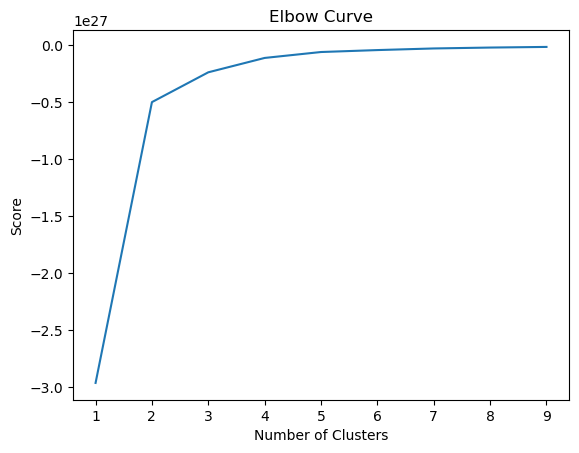

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

2-4 appears to be the point of diminishing returns. For further confirmation A silhoutte analysis will be utilized to confirm the most appropriate cluster for the analysis.

## b. Silhouette Analysis

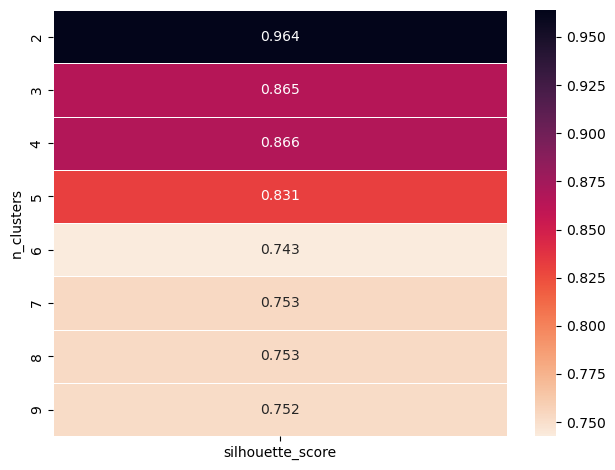

In [143]:
clusters_range= range(2,10)
results=[]
for c in clusters_range:
    clusterer = KMeans(n_clusters = c, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(df_kmeans)
    silhouette_avg = silhouette_score(df_kmeans, cluster_labels)
    results.append([c, silhouette_avg])

results = pd.DataFrame(results, columns = ['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(results, index='n_clusters', values ='silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot= True, linewidth=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

2 clusters is indicated to be the most appropriate for the following k-means analysis.

# 3. k-means clustering

In [10]:
# Creating a k-means object.

kmeans = KMeans(n_clusters = 2, n_init=10) #to prevent the warning popup, 10 (the default value) was selected for n_init value 

In [11]:
# Fitting the k-means object to the data.

kmeans.fit(df_kmeans)

KMeans(n_clusters=2, n_init=10)

In [12]:
df['clusters'] = kmeans.fit_predict(df_kmeans)
df.head()

,year,Country,region,happiness_rank,happiness_score,perceptions_of_economy,social_support,healthy_life_expectancy,perceptions_of_freedom,perceptions_of_generosity,perceptions_of_corruption,GDP,GDP_per_capita,GDP_per_capita_annual_ growth,clusters
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,6.940000e+11,83806.44760,0.494130,1
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.751721e+10,52951.68151,3.354145,1
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,3.030000e+11,53254.85637,1.622166,1
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,3.880000e+11,74809.96580,0.444639,1
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.560000e+12,43596.13554,-0.089286,1


In [13]:
df['clusters'].value_counts()

clusters
1    772
0     10
Name: count, dtype: int64

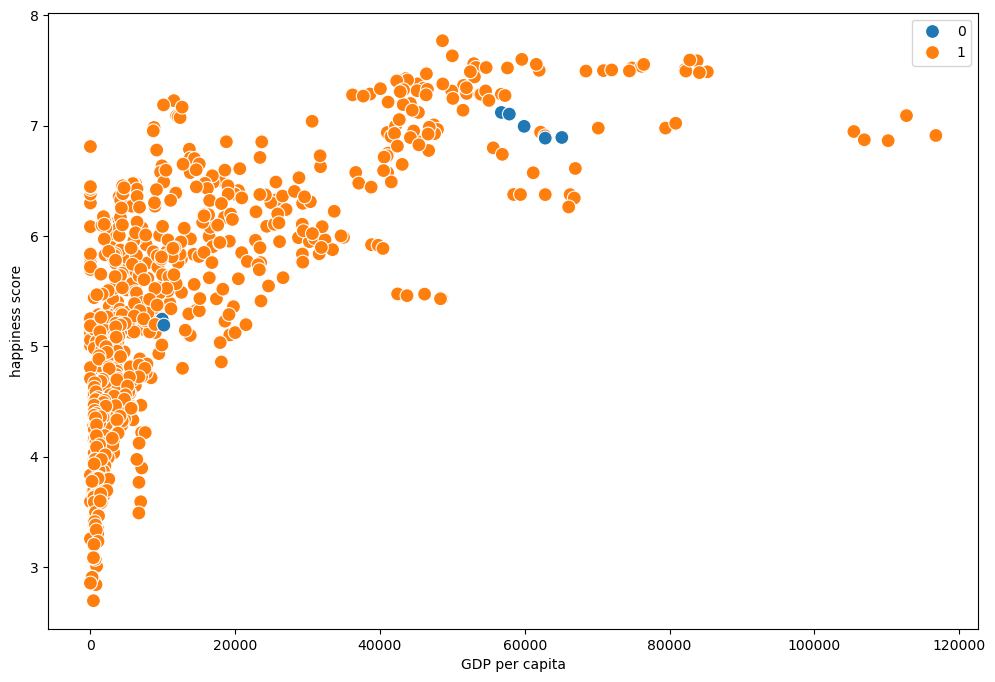

In [14]:
# Plotting the clusters for the "GDP_per_capita" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP_per_capita'], y=df['happiness_score'], hue=kmeans.labels_, s=100) 

plt.xlabel('GDP per capita') 
plt.ylabel('happiness score')
plt.show()

The initial cluster analysis does not depict any strong visual clustering for GDP_ per_capita

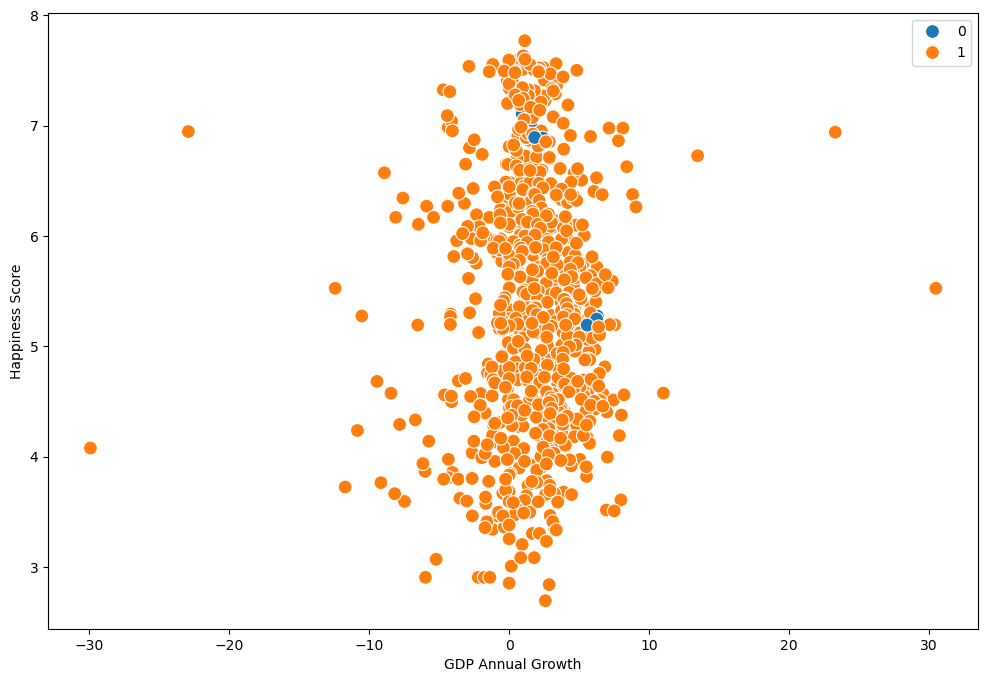

In [15]:
# Plot the clusters for the "GDP_per_capita_annual_ growth" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP_per_capita_annual_ growth'], y=df['happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDP Annual Growth') 
plt.ylabel('Happiness Score')
plt.show()

The initial cluster analysis does not depict any strong visual clustering for GDP_per_capita_annual_ growth

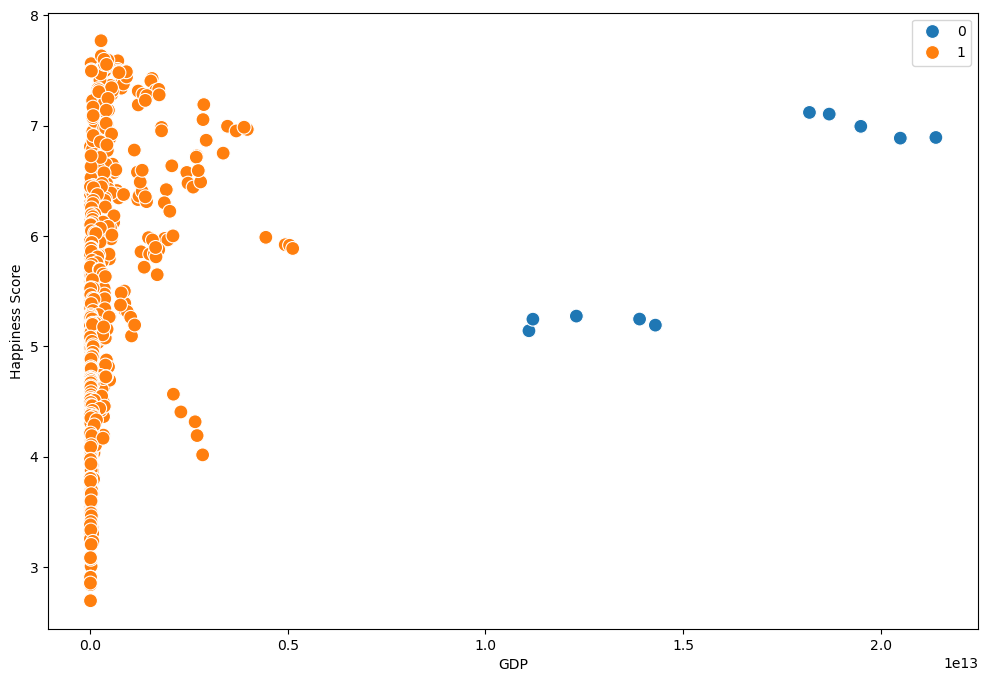

In [16]:
# Plot the clusters for the "GDP" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP'], y=df['happiness_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDP') 
plt.ylabel('Happiness Score')
plt.show()

reviewing total GDP 'blue' values appear to cluster with values over 1 trillion in ($U.S.) GDP. This clustering appears to isolate some of the larger outliers for this data set in this column. 

# 4. further analysis of GDP clusters

In [44]:
#Creating flag for clusters
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'

In [45]:
#identifying blue cluster's country names
blue = df[df['cluster']== 'blue']

blue['Country'].value_counts()

Country
United States of America    5
China                       5
Name: count, dtype: int64

In [19]:
#aggregating descriptive statistics to compare blue versus ornage clusters
df.groupby('cluster').agg({'happiness_score':['mean', 'median'], 
                         'perceptions_of_economy':['mean', 'median'], 
                         'GDP_per_capita':['mean', 'median'],
                          'GDP_per_capita_annual_ growth':['mean', 'median']})

happiness_score         perceptions_of_economy            \
                   mean  median                   mean    median   
cluster                                                            
blue           5.369563  5.3220               0.911985  0.976120   
orange         6.108900  6.0795               1.229682  1.237838   

        GDP_per_capita               GDP_per_capita_annual_ growth            
                  mean        median                          mean    median  
cluster                                                                       
blue      13952.173484   5006.818493                      1.643970  1.789247  
orange    34745.808071  33453.294835                      3.950588  3.990092

Examining the 'blue' clusters reveals that the overall Gross Domestic Product (GDP) is predominantly influenced by only two specific countries in this dataset. While the aggregated data showcases a higher total GDP for the blue clusters, this elevated economic metric does not necessarily align with increased levels of happiness scores or positive perceptions of the economy.

Considering the notable deviation between the blue clusters and the remainder of the dataset the next part of this analysis will remove the two outliers and then remove them from teh k-means clustering to see is the analysis can be enhanced. By excluding these possible influential outliers, exploration into patterns with the remainder of the dataset may emerge with a less skewed distribution and potentially offer deeper insights into the relationships between variables.  

It is important to note that removal of these data points may introduce exclusionary bias into the dataset. However, this step is primarily exploratory, seeking to uncover additional insights rather than being a definitive measure for the final analysis production. The objective is to assess whether removal of the highest outliers contributes meaningful insights to the analysis without compromising the overall integrity of the dataset.

## 6. Reproducing K-means with removal with the U.S. and China

##### Preprocessing dataset

In [89]:
#subsetting data without'United States of America' and 'China'
countries_to_exclude = ['United States of America', 'China']
df_subset = df[~df['Country'].isin(countries_to_exclude)].reset_index(drop=True)

print(len(df_subset))

772


In [93]:
#creating kmeans column subset from the df_subset
df_kmeans2 =df_subset[['happiness_score','perceptions_of_economy', 'social_support', 'healthy_life_expectancy',
       'perceptions_of_freedom', 'perceptions_of_generosity',
       'perceptions_of_corruption', 'GDP', 'GDP_per_capita',
       'GDP_per_capita_annual_ growth']]

print(len(df_kmeans2))

772


In [94]:
# Defining data clusters and defining k-means cluster
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] 

In [95]:
#Creating a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_kmeans2).score(df_kmeans2) for i in range(len(kmeans))]

score

[-3.5873697424332705e+26,
 -9.709265190547894e+25,
 -4.513159452228099e+25,
 -2.7928312654829496e+25,
 -1.386880901097736e+25,
 -9.533212010733805e+24,
 -6.725844867876661e+24,
 -4.496059610016623e+24,
 -3.3283252959660927e+24]

##### Silhouette analysis to determine clusters on df_subset

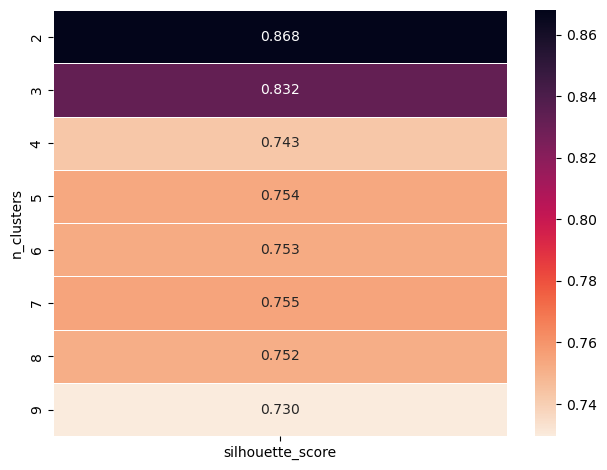

In [96]:
clusters_range= range(2,10)
results=[]
for c in clusters_range:
    clusterer = KMeans(n_clusters = c, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(df_kmeans)
    silhouette_avg = silhouette_score(df_kmeans2, cluster_labels)
    results.append([c, silhouette_avg])

results = pd.DataFrame(results, columns = ['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(results, index='n_clusters', values ='silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot= True, linewidth=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

both 2-3 appear to be strongly indicated as clustering options.2 will be used as it  has the highest silhouette_score and will mirror the first part of this analysis

##### Running Kmeans analysis

In [153]:
# Creating a k-means object.

kmeans = KMeans(n_clusters = 2, n_init=10) 

In [154]:
# Fitting the k-means object to the data.

kmeans.fit(df_kmeans2)

KMeans(n_clusters=2, n_init=10)

In [155]:
df_subset['clusters2'] = kmeans.fit_predict(df_kmeans2)
df.head()

,year,Country,region,happiness_rank,happiness_score,perceptions_of_economy,social_support,healthy_life_expectancy,perceptions_of_freedom,perceptions_of_generosity,perceptions_of_corruption,GDP,GDP_per_capita,GDP_per_capita_annual_ growth,clusters,cluster
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,6.940000e+11,83806.44760,0.494130,1,orange
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.751721e+10,52951.68151,3.354145,1,orange
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,3.030000e+11,53254.85637,1.622166,1,orange
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,3.880000e+11,74809.96580,0.444639,1,orange
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.560000e+12,43596.13554,-0.089286,1,orange


In [156]:
df_subset['clusters2'].value_counts()

clusters2
0    713
1     59
Name: count, dtype: int64

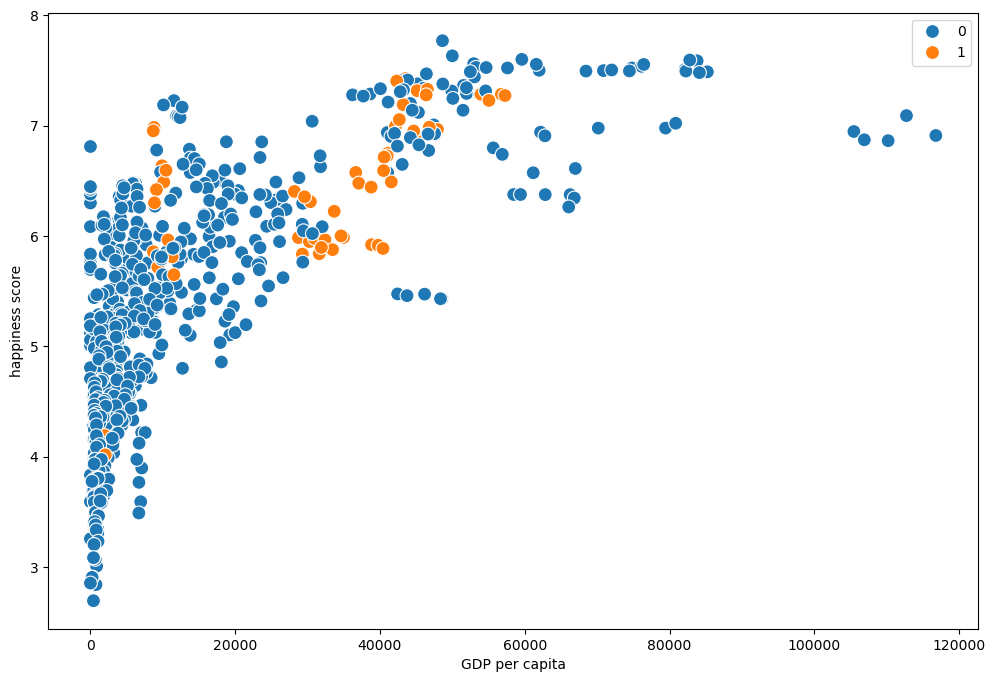

In [157]:
# Plotting the clusters for the "GDP_per_capita" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['GDP_per_capita'], y=df_subset['happiness_score'], hue=kmeans.labels_, s=100) 

plt.xlabel('GDP per capita') 
plt.ylabel('happiness score')
plt.show()

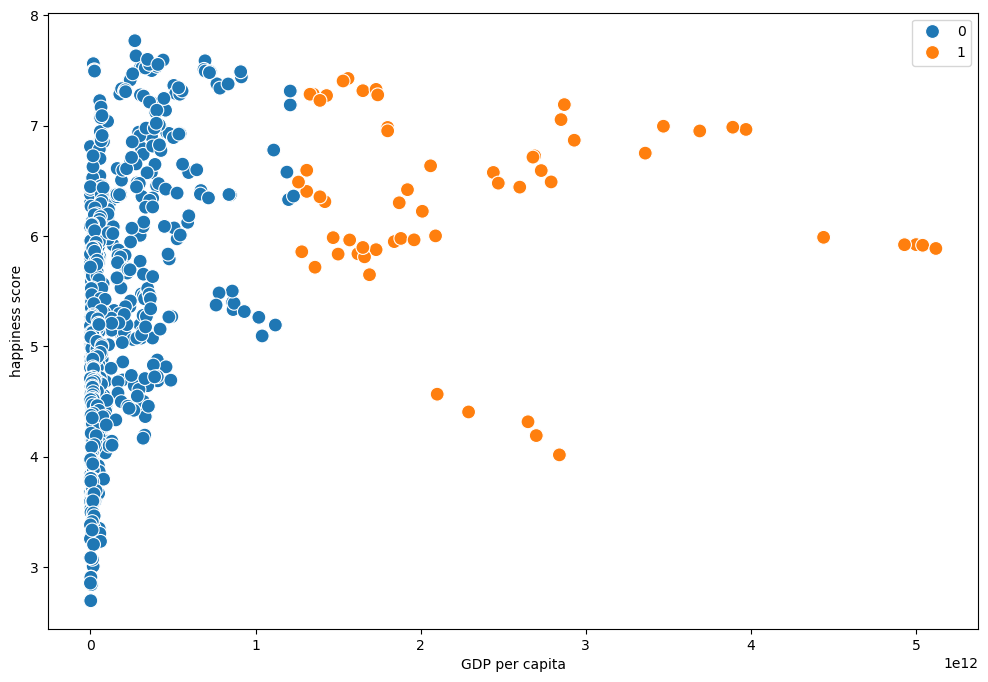

In [158]:
# Plotting the clusters for the "GDP" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['GDP'], y=df_subset['happiness_score'], hue=kmeans.labels_, s=100) 

plt.xlabel('GDP per capita') 
plt.ylabel('happiness score')
plt.show()

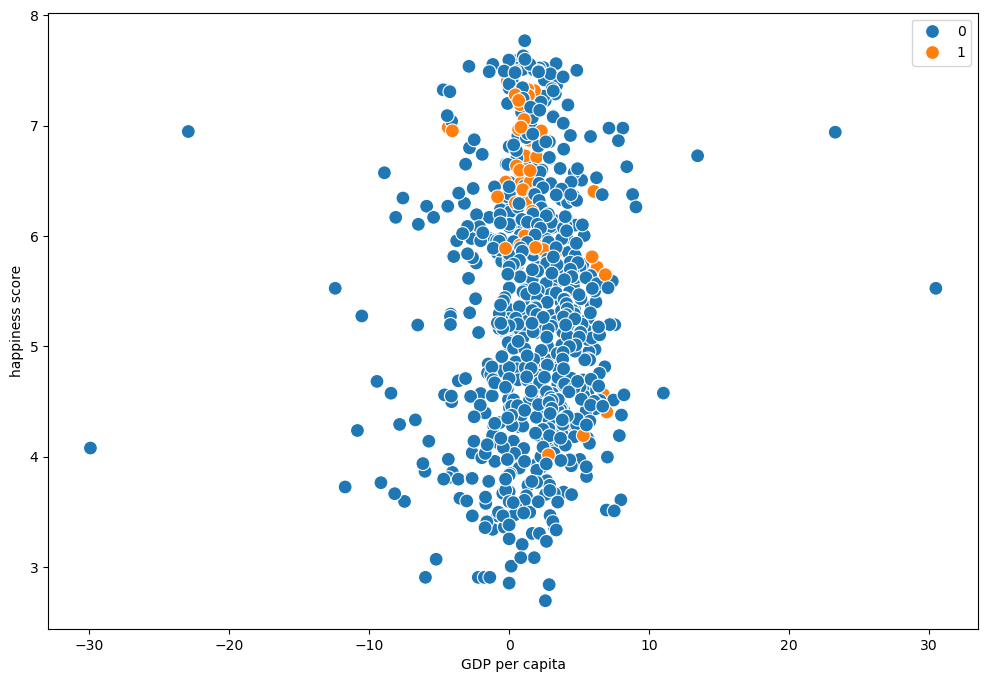

In [159]:
# Plotting the clusters for the "GDP_per_capita_annual_ growth" and "happiness_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['GDP_per_capita_annual_ growth'], y=df_subset['happiness_score'], hue=kmeans.labels_, s=100) 

plt.xlabel('GDP per capita') 
plt.ylabel('happiness score')
plt.show()

In [161]:
#Creating flag for clusters2
df_subset.loc[df_subset['clusters2'] == 0, 'cluster_subset'] = 'blue'
df_subset.loc[df_subset['clusters2'] == 1, 'cluster_subset'] = 'orange'

In [163]:
# Grouping by both 'Country' and 'Region' and get the value counts to view regions of the world bytheir country names
orange = df_subset[df_subset['cluster_subset']== 'orange']

orange_counts = orange.groupby(['Country', 'region']).size().reset_index(name='Count')

# Sort the DataFrame by 'Count' column in descending order
orange_counts = orange_counts.sort_values(by='Count', ascending=False)

print(orange_counts)

           Country                       region  Count
1           Brazil  Latin America and Caribbean      5
2           Canada                North America      5
3           France               Western Europe      5
4          Germany               Western Europe      5
5            India                Southern Asia      5
6            Italy               Western Europe      5
7            Japan                 Eastern Asia      5
9           Russia   Central and Eastern Europe      5
10     South Korea                 Eastern Asia      5
12  United Kingdom               Western Europe      5
0        Australia    Australia and New Zealand      4
11           Spain               Western Europe      3
8           Mexico  Latin America and Caribbean      2


In [164]:
#running descriptive statistics on df_subset clusters_subset
df_subset.groupby('cluster_subset').agg({'happiness_score':['mean', 'median'], 
                         'perceptions_of_economy':['mean', 'median'], 
                         'GDP_per_capita':['mean', 'median'],
                          'GDP_per_capita_annual_ growth':['mean', 'median']})

happiness_score        perceptions_of_economy           \
                          mean median                   mean   median   
cluster_subset                                                          
blue                  5.291195  5.235               0.884349  0.93929   
orange                6.316627  6.419               1.245953  1.29400   

               GDP_per_capita               GDP_per_capita_annual_ growth  \
                         mean        median                          mean   
cluster_subset                                                              
blue             12579.810956   4280.288404                      1.637765   
orange           30536.825741  34622.169670                      1.718958   

                          
                  median  
cluster_subset            
blue            1.917912  
orange          1.384346

After completing this secondary kmeans analysis additional insights can be identified  between cluster subsets. Notably, Western Europe has a higher presence in teh orange cluster. Orange clusters overall exhibit consistently elevated levels of annual GDP growth and total GDP with higher happiness scores.

The next step in this analysis would be to isolate these variables by mapping out refgional economic metrics to see if further evidence can be found to support the hypothese that regional economic well being does, or does ,not have an impact on happiness scores.